In [1]:
cd ..

/home/jovyan/Capstone/critical_feature_extraction


In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from lib.plr import PLR, connect_line
%matplotlib inline

## Transforming PLR into a trading signal ranging between 0 and 1

In [3]:
close = pd.read_csv("data/sandp500/individual_stocks_5yr/MSFT_data.csv")["Close"].values

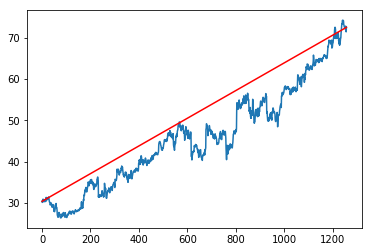

In [5]:
plt.plot(close)

piece, lines, points = PLR(close, 20)

piece
plt.plot(piece, c= "red")

In [375]:
np.diff(points)
points[2]

609

In [376]:
buy_true = []
period = min(np.diff(points[1:]))/2
period = math.floor(period)

In [377]:
for the_points in points[1:]:
    if piece[the_points] - piece[the_points + period] > 0:
        buy_true.append(-1)
    if piece[the_points] - piece[the_points + period] < 0:
        buy_true.append(1)
        
buy_true

[1, 1, -1, 1, -1, 1]

In [378]:
np.diff(points)

array([217, 392,  24, 234,  54,  20])

In [379]:
halfway_list = []
for number_points in range(len(np.diff(points))):
    halfway_list.append(((np.diff(points))[number_points]/2) + points[number_points])

In [380]:
halfway_list = []
for these_points in range(len(points[1:])):
    if these_points != 0:
        halfway_list.append(((np.diff(points))[these_points]/2) + points[1:][these_points-1])
                            
    if these_points == 0:
        halfway_list.append((np.diff(points))[these_points]/2)
                            
halfway_list

[108.5, 413.0, 621.0, 750.0, 894.0, 931.0]

In [381]:
def up_down_trend(arr, epsilon):
    pieces, lines, points = PLR(arr, epsilon)
    points.append(len(arr) - 1)
    diffs = np.diff(points)
    trend_labels = []
    for point, diff in zip(points[1:], diffs):
        up = [arr[point] - arr[point - 5] > 0]
        trend_labels.append(up * diff)
    
    return trend_labels


def trading_signal(arr, epsilon):
    
    labels = up_down_trend(arr, epsilon)
    
    #for trend_list in labels:
        

In [382]:
lists = up_down_trend(close, 20)

In [383]:
connect_line(close, (0, len(close) - 1))(1) - connect_line(close, (0, len(close) - 1))(0) > 0

True

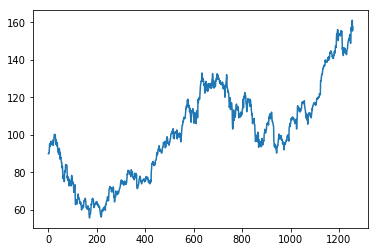

In [384]:
plt.plot(close)

In [385]:
close_list = []
x_list = []
for list_number in range(len(lists)):
    x_axis = points[1:]
    x_list.append(x_axis)
    close_list.append(close[x_axis])

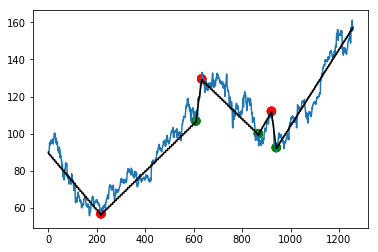

In [386]:
plt.plot(close)
plt.scatter(x_list, close_list, cmap=buy_true, color = ['r', 'g'], s = 70)
plt.plot(piece, c= "black")

In [387]:
x_list[0]

[217, 609, 633, 867, 921, 941]

In [388]:
technicals = pd.read_csv("data/sandp500/individual_stocks_5yr_TECHNICALS/DIS_data.csv")

In [389]:
for x_days in range(len(x_list[0])):
    for days in technicals['Unnamed: 0']:
        if x_list[0][x_days] == days:
            technicals.loc[technicals['Unnamed: 0'] == x_list[0][x_days], 'target'] = buy_true[x_days]

In [390]:
technicals.loc[technicals['target'].isnull(), 'target'] = 0

In [391]:
dummies = pd.get_dummies(technicals['target'])
dummies

,-1.0,0.0,1.0
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [392]:
dummies = dummies.drop(0.0, 1)

In [393]:
technicals['buy'] = dummies[1.0]
technicals['sell'] = dummies[-1.0]

In [394]:
technicals = technicals.drop('target', 1)

In [395]:
technicals[technicals['buy'] == 1]

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Name,Acc/Dist_ROC_1,ADX_14_50,...,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13,buy,sell
217,217,2013-06-26,62.95,63.46,62.75,63.21,5722061,DIS,0.0,0.308855,...,0.446912,0.890528,0.444050,0.464993,0.647887,-0.002361,0.000440,-0.072942,1,0
609,609,2015-01-15,94.61,94.96,94.04,94.35,5662230,DIS,-0.0,0.278230,...,0.398598,1.134183,0.429711,0.445160,0.336957,0.001159,0.001056,0.130469,1,0
867,867,2016-01-26,95.49,96.43,95.09,96.27,6895218,DIS,0.0,0.471996,...,1.754916,4.535450,0.583869,0.483748,0.880597,-0.004212,-0.003881,-0.358322,1,0
941,941,2016-05-11,101.46,102.50,100.62,102.29,27011855,DIS,0.0,0.354152,...,1.604540,2.067473,0.740544,0.636747,0.888298,0.001182,0.001893,0.249739,1,0
